## Z e-commerce Data analysis

## *set options

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 500)

pd.set_option('display.max_columns', 500)

### connec zigzag_DB.db & order table

In [3]:
import sqlite3

In [4]:
# connect
connect = sqlite3.connect('data/zigzag_DB.db')
connect

In [5]:
query = "SELECT * FROM sqlite_master"

schema = pd.read_sql(query, connect)

for i in schema['sql']:
    print(i)

CREATE TABLE "order" (
"timestamp" TEXT,
  "user_id" TEXT,
  "goods_id" INTEGER,
  "shop_id" INTEGER,
  "price" INTEGER
)
CREATE TABLE "good" (
"goods_id" INTEGER,
  "timestamp" TEXT,
  "shop_id" INTEGER,
  "category" TEXT,
  "price" INTEGER,
  "image_type" TEXT,
  "image_width" INTEGER,
  "image_height" INTEGER
)
CREATE TABLE "shop" (
"shop_id" INTEGER,
  "name" TEXT,
  "category" TEXT,
  "age" TEXT,
  "style" TEXT
)
CREATE TABLE "log" (
"timestamp" TEXT,
  "user_id" TEXT,
  "event_origin" TEXT,
  "event_name" TEXT,
  "event_goods_id" REAL,
  "event_shop_id" REAL
)
CREATE TABLE "user" (
"user_id" TEXT,
  "os" TEXT,
  "age" INTEGER
)


In [6]:
query = "SELECT * FROM 'order'"

order = pd.read_sql(query, connect)
order.head()

,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


#### Daily revenue top 10 shopping platform

In [7]:
table = pd.pivot_table(order,
                                   values = 'price',
                                   index = 'shop_id',
                                   aggfunc = 'sum')

table.sort_values(( 'price'), ascending=False).head(10)

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400
6,655900
11,653000
60,558300
19,518400


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [9]:
table = pd.pivot_table(order,
                                   values = 'price',
                                   index = 'shop_id',
                                   aggfunc = ['sum', 'count'])

table.columns = ['sum', 'count']
table = table.sort_values('sum', ascending=False).head(10)
table

,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


In [10]:
table_top10 = table.head(10)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


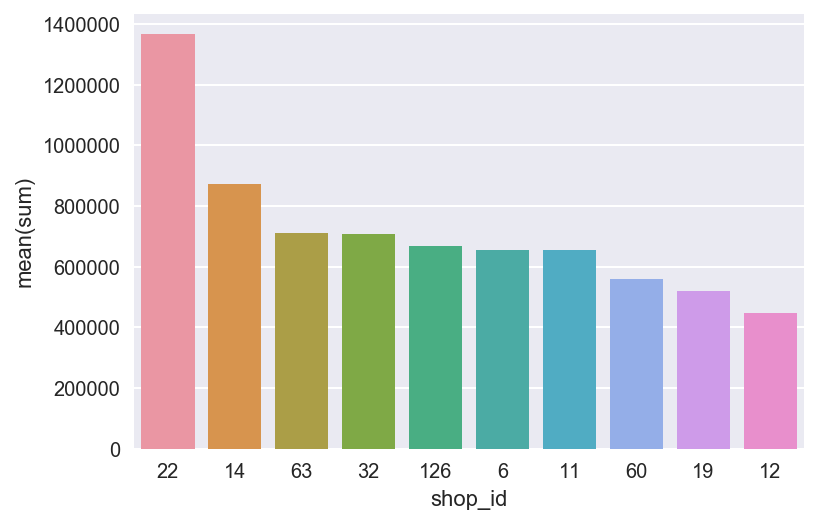

In [12]:
sns.barplot(data=table_top10, x=table_top10.index, y='sum', order=table_top10.index)

### Trend (time) using lineplot 

In [15]:
import matplotlib as mpl

sns.set_style('whitegrid') 

mpl.rc('font', family='AppleGothic') # window OS recommend = Malgun Gothic
mpl.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [16]:
order['timestamp'] = pd.to_datetime(order['timestamp'])
order.dtypes

timestamp    datetime64[ns]
user_id              object
goods_id              int64
shop_id               int64
price                 int64
dtype: object

In [17]:
plt.figure(figsize=[15,3.5])
sns.lineplot(x='timestamp', y='price', data=order)

AttributeError: module 'seaborn' has no attribute 'lineplot'

### Trend (binning)

In [18]:
order['hour'] = order['timestamp'].dt.hour

In [19]:
table = order.pivot_table(values='price',
                                         index='hour',
                                         aggfunc='sum')

table.head()

,price
hour,
0,1479210
1,990300
2,787830
3,467650
4,304800


In [22]:
plt.figure(figsize=[15,4])
sns.lineplot(data=table, x=table.index, y='price')
plt.savefig('image3.png')

AttributeError: module 'seaborn' has no attribute 'lineplot'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


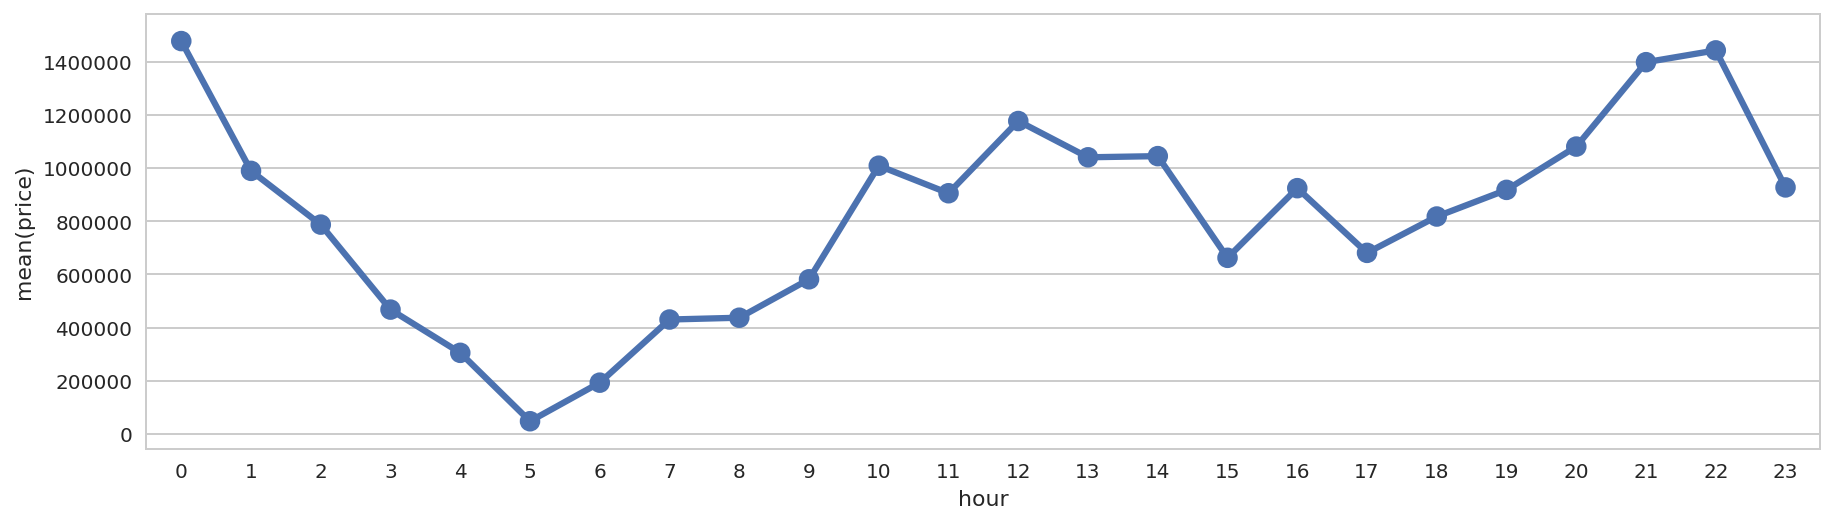

In [21]:
plt.figure(figsize=[15,4])
sns.pointplot(data=table, x=table.index, y='price')
plt.savefig('image4.png')

### Merge user table & order table

In [23]:
query = "SELECT * FROM 'user'"
user = pd.read_sql(query, connect)
print(user.shape)
user.head()

(10000, 3)


,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [24]:
merged = order.merge(user, on='user_id')
merged.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17


### Sales to 10 shopping platform by ages

In [25]:
merged_top10 = merged[(merged['shop_id'].isin(top10_index)) & (merged['age'] != -1)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


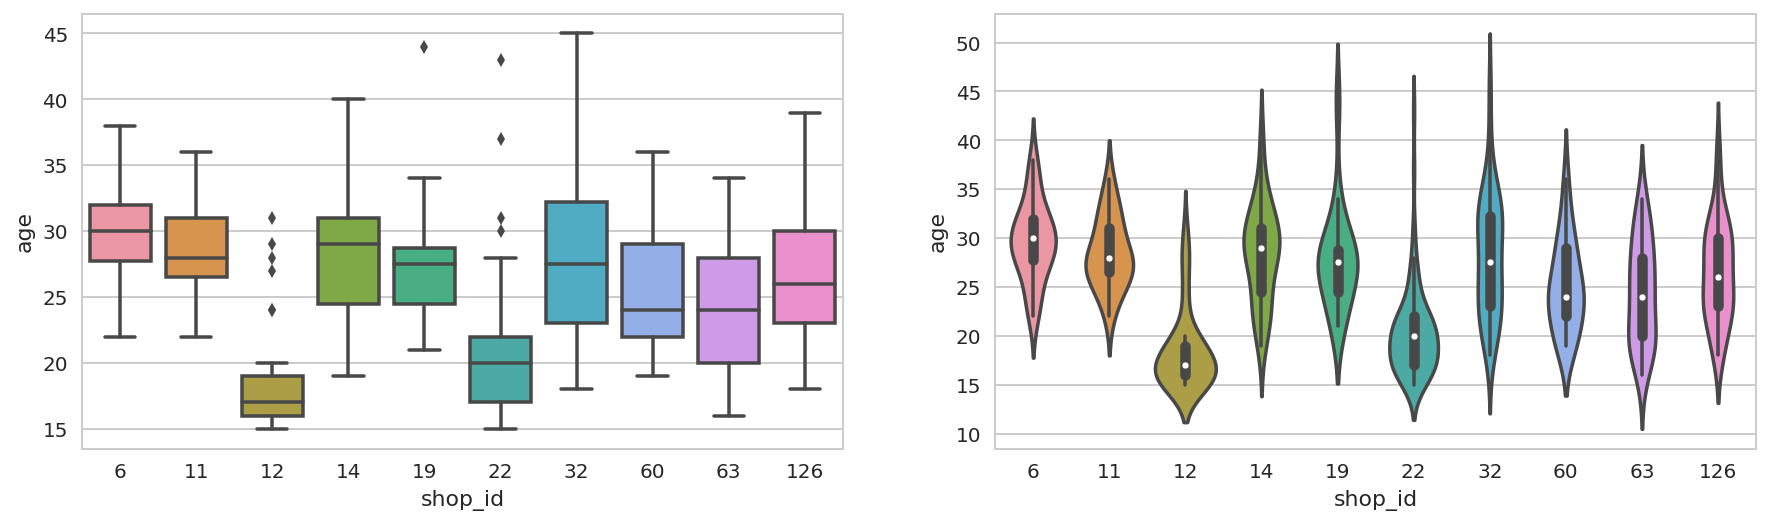

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches([15,4])

sns.boxplot(data = merged_top10, x='shop_id', y='age', ax=ax1)
sns.violinplot(data = merged_top10, x='shop_id', y='age', ax=ax2)

fig.savefig('figure.png', dpi=400)

### Create age column in user table 

In [27]:
def make_generation(age):
    if age == -1:
        return '미입력'
    elif age // 10 >= 4:
        return "30대 후반"
    elif age // 10 == 1:
        return "10대"
    elif age % 10 < 3:
        return str(age // 10 * 10) + f"대 초반"
    elif age % 10 <= 6:
        return str(age // 10 * 10) + f"대 중반"
    else:
        return str(age // 10 * 10) + f"대 후반"

    
print(make_generation(10))
print(make_generation(23))
print(make_generation(29))
print(make_generation(32))
print(make_generation(35))
print(make_generation(40))

10대
20대 중반
20대 후반
30대 초반
30대 중반
30대 후반


In [28]:
age_list = ['10대', '20대 초반', '20대 중반', '20대 후반', '30대 초반', '30대 중반', '30대 후반']
for i in age_list:
    user["연령대"] = user['age'].map(make_generation)
user.head()

,user_id,os,age,연령대
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41,30대 후반
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31,30대 초반
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16,10대
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41,30대 후반
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42,30대 후반


### shop table (merge with user, order table)

In [29]:
query = "SELECT * FROM 'shop'"

In [30]:
shop = pd.read_sql(query, connect, index_col='shop_id')
print(shop.shape)
shop.head()

(200, 4)


,name,category,age,style
shop_id,,,,
1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일


In [31]:
merged_table = (
order.merge(user, on='user_id')
    .merge(shop, on='shop_id')
)

merged_table.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직


In [32]:
# check age
def check_generation(row):
    if row['category'] == '의류' and row['연령대'] == '미입력':
        return True
    else:
        return row['연령대'] in str(row['age_y'])

In [33]:
merged_table['거래연령 일치여부'] = merged_table.apply(check_generation, axis=1)
merged_table.head(2)

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style,거래연령 일치여부
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,False
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True


In [34]:
table = merged_table.pivot_table(values='거래연령 일치여부',
                                                    index='shop_id',
                                                    aggfunc=['mean', 'count'])

table.head()

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
1,0.666667,3
2,0.937500,16
3,0.400000,5
4,1.000000,1
5,0.000000,1


### show top 10 platform result

`table[table.index.isin(top10_index)]`

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th>mean</th>
      <th>count</th>
    </tr>
    <tr>
      <th></th>
      <th>거래연령 일치여부</th>
      <th>거래연령 일치여부</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>6</th>
      <td>0.750000</td>
      <td>24</td>
    </tr>
    <tr>
      <th>11</th>
      <td>0.684211</td>
      <td>19</td>
    </tr>
    <tr>
      <th>12</th>
      <td>0.857143</td>
      <td>42</td>
    </tr>
    <tr>
      <th>14</th>
      <td>0.566667</td>
      <td>30</td>
    </tr>
    <tr>
      <th>19</th>
      <td>0.789474</td>
      <td>19</td>
    </tr>
    <tr>
      <th>22</th>
      <td>0.929293</td>
      <td>99</td>
    </tr>
    <tr>
      <th>32</th>
      <td>0.540541</td>
      <td>37</td>
    </tr>
    <tr>
      <th>60</th>
      <td>0.695652</td>
      <td>23</td>
    </tr>
    <tr>
      <th>63</th>
      <td>0.000000</td>
      <td>27</td>
    </tr>
    <tr>
      <th>126</th>
      <td>0.000000</td>
      <td>39</td>
    </tr>
  </tbody>
</table>

### cleaning style tag data

In [35]:
style_list = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩',
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '펑키', '큐티', '볼드&에스닉' ]

In [36]:
for style in style_list:
    shop[f"{style}"] = shop['style'].str.contains(style)

### Define high sales performance for style per day (age)

In [37]:
merged = (
    order.merge(shop, on='shop_id')
             .merge(user, on='user_id')
)
print(merged.shape)
merged.head(3)

(867, 32)


,timestamp,user_id,goods_id,shop_id,price,hour,name,category,age_x,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉,os,age_y,연령대
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,iOS,39,30대 후반
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,32,30대 초반
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,37,30대 후반


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


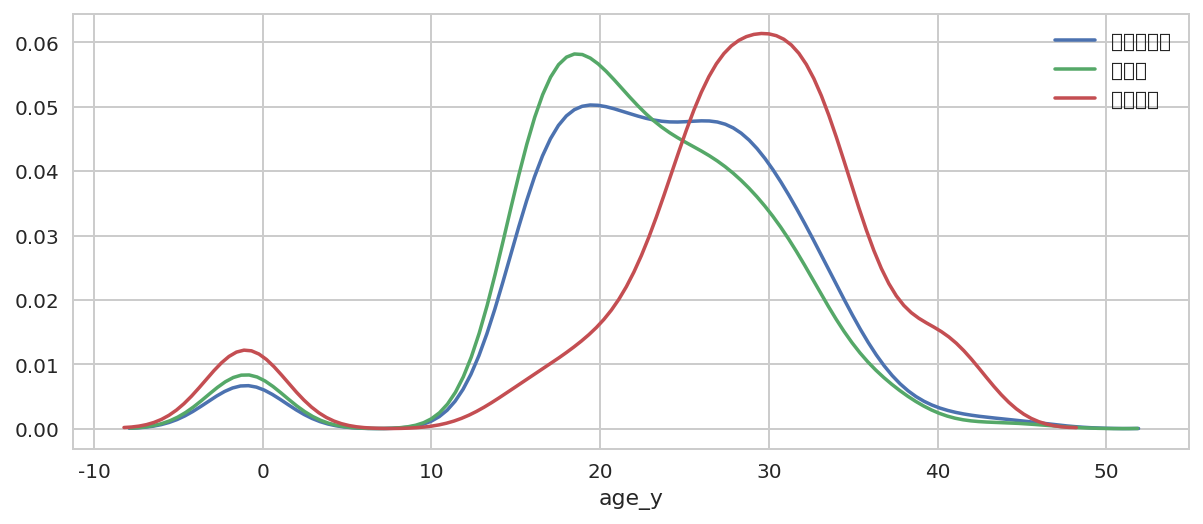

In [38]:
plt.figure(figsize=[10,4])

sns.distplot(merged.loc[merged['심플베이직'] == True, 'age_y'], label = '심플베이직', hist=False)
sns.distplot(merged.loc[merged['러블리'] == True, 'age_y'], label = '러블리', hist=False)
sns.distplot(merged.loc[merged['모던시크'] == True, 'age_y'], label = '모던시크', hist=False)

plt.savefig('dist.png', dpi=400)

----

### From here, log data analysis

#### key driver factor

1. page duration
2. session
3. 체류 시간 (the length of day)

In [39]:
query = "SELECT * FROM 'log'"

data_logs = pd.read_sql(query, connect)
print(data_logs.shape)
data_logs.head()

(105815, 6)


,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN


In [40]:
data_logs['timestamp'] = pd.to_datetime(data_logs['timestamp'])

### log data
- Column
        1. timestamp : event time
        2. user_id : 
        3. event_origin : location
            - event_origin 
                a. goods_search_result : 
                b. shops_ranking : 
                c. shops_bookmark :
                d. category_search_result : 
                e. my_goods :          
        4. event_name : 
            - event_name 
                a. app_page_view : 
                b. enter_browser : 
                c. add_bookmark : 
                d. remove_bookmark : 
                e. add_my_goods :
                f. remove_my_goods :                 
        5. event_goods_id :             
        6. event_shop_id : 

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>user_id</th>
      <th>os</th>
      <th>age</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>--PYPMX8QWg0ioT5zfORmU-S5Lln0lot</td>
      <td>And</td>
      <td>41</td>
    </tr>
    <tr>
      <th>1</th>
      <td>-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv</td>
      <td>iOS</td>
      <td>31</td>
    </tr>
    <tr>
      <th>2</th>
      <td>-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN</td>
      <td>iOS</td>
      <td>16</td>
    </tr>
    <tr>
      <th>3</th>
      <td>-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1</td>
      <td>And</td>
      <td>41</td>
    </tr>
    <tr>
      <th>4</th>
      <td>-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k</td>
      <td>And</td>
      <td>42</td>
    </tr>
  </tbody>
</table>




#### simplification of user_id 

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>user_id</th>
      <th>n_user_id</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>K1d8_t3-QIskaSkrx32oAFu856D8JmLo</td>
      <td>3314</td>
    </tr>
    <tr>
      <th>1</th>
      <td>lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3</td>
      <td>7844</td>
    </tr>
    <tr>
      <th>2</th>
      <td>mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8</td>
      <td>7920</td>
    </tr>
    <tr>
      <th>3</th>
      <td>K1d8_t3-QIskaSkrx32oAFu856D8JmLo</td>
      <td>3314</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Yjny5AchUWLiuv4kdeq50COF-S8OFXPd</td>
      <td>5608</td>
    </tr>
    <tr>
      <th>5</th>
      <td>LZZ0ktGq6hW685TFAQfcGNhsKVUEceHl</td>
      <td>3548</td>
    </tr>
    <tr>
      <th>6</th>
      <td>TUoAGIbbNds5cYLZLnz-R5VlkG5L8RuZ</td>
      <td>4790</td>
    </tr>
    <tr>
      <th>7</th>
      <td>B9F_BHH9F3b6MW329go9jDr71Uunx629</td>
      <td>1902</td>
    </tr>
    <tr>
      <th>8</th>
      <td>e_xrTZ9fHVodxxadLx688qUKMWCdL8bW</td>
      <td>6663</td>
    </tr>
    <tr>
      <th>9</th>
      <td>aA9S7LxnFm6ym6IUEa-4SSxJa-iL5m2J</td>
      <td>5976</td>
    </tr>
  </tbody>
</table>

In [41]:
user_id = user['user_id'].unique()

user_id

array(['--PYPMX8QWg0ioT5zfORmU-S5Lln0lot',
       '-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv',
       '-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN', ...,
       'zz-aNy7UWfvyrZxO4Fs4K5ewmqZVaMOs',
       'zznj-LHhddVvuzZmbZpw6MSylLO64982',
       'zzxBQ7i7mttX0cv1GqFuuMstg7keEkdV'], dtype=object)

In [42]:
n_user_id = range(user['user_id'].size)

n_user_id

range(0, 10000)

In [43]:
id_zip = zip(user_id, n_user_id)

print(id_zip)

In [44]:
list(zip(user_id, n_user_id))[:5]


[('--PYPMX8QWg0ioT5zfORmU-S5Lln0lot', 0),
 ('-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv', 1),
 ('-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN', 2),
 ('-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1', 3),
 ('-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k', 4)]

In [45]:
id_dict = dict(id_zip)

id_dict

{'--PYPMX8QWg0ioT5zfORmU-S5Lln0lot': 0,
 '-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv': 1,
 '-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN': 2,
 '-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1': 3,
 '-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k': 4,
 '-3fmY1WsLkYJwN_8lZQMmxZd6zJTAcT1': 5,
 '-3q-oynqxFEgSHUwX802hpmi1louyQNv': 6,
 '-428TMckUlhn6ptxN7gR2FGaSyXjSnaD': 7,
 '-4O8WnD8dT6nWho-4KbIm6TvnK4BmjX_': 8,
 '-4ltLPS55n6J2wSUCLxEZwxYdeW37cK5': 9,
 '-5BA0EwkyhGLCC8FxzvvDgyrZWYJM33I': 10,
 '-5Cwn2Fcx9j16QSM2-SLiaLMm0sS4E2I': 11,
 '-5o3lkvJctT3uURb5JWPVxe1VjqhyzAi': 12,
 '-622WUNWBtjX5VGKx8UnOtn2NVHD_NaB': 13,
 '-62U2A3KHjNZ2XXmOgQTSWEfPg1RRWWy': 14,
 '-63J8veARgGL3ulnRKblm4xhhwkvjKzG': 15,
 '-6UZWGgl3AAI7Df2sVWLX6oT6zP43zo0': 16,
 '-6jxyh56lSivkbLm3WNGRCmdyrdsBmNW': 17,
 '-71z4lG_D-eKnOmDCJlUaNvVcwd808yw': 18,
 '-75tFsDSoUwapUvwCUHTZiGTGkaSDleQ': 19,
 '-7SKUZkBmbG2ZMvJ0E0jmMDcd8PgmARb': 20,
 '-7uBbvfy4gff6mHV9XotjVO2YlCY2r8v': 21,
 '-8htVW7UIA8qRupSdCx-6PzIXLI_vk2p': 22,
 '-9qbSavSdufdw9JwmiWX1_URT2E2QxFZ': 23,
 '-Ae6T8G5uAZldwUEOTMR-KzG

**Hint) mapping example**

```
data['column'].map(dict or def)
```

In [46]:
data_logs["n_user_id"] = data_logs['user_id'].map(id_dict)
order["n_user_id"] = order['user_id'].map(id_dict)
user["n_user_id"] = user['user_id'].map(id_dict)

data_logs[['user_id', 'n_user_id']].head()

,user_id,n_user_id
0,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3314
1,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,7844
2,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,7920
3,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3314
4,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,5608


### Concat log data & order data 

In [47]:
order.iloc[0]

timestamp          2018-06-11 00:00:43.032000
user_id      bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx
goods_id                                 1414
shop_id                                    38
price                                   45000
hour                                        0
n_user_id                                6241
Name: 0, dtype: object

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>timestamp</th>
      <th>user_id</th>
      <th>event_origin</th>
      <th>event_name</th>
      <th>event_goods_id</th>
      <th>event_shop_id</th>
      <th>n_user_id</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>878</th>
      <td>2018-06-11 00:06:45.357</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>901</th>
      <td>2018-06-11 00:06:54.034</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨바지</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>1062</th>
      <td>2018-06-11 00:08:00.579</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨바지</td>
      <td>enter_browser</td>
      <td>2048.0</td>
      <td>46.0</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>1259</th>
      <td>2018-06-11 00:09:38.881</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨바지</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>1439</th>
      <td>2018-06-11 00:11:04.446</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨바지</td>
      <td>enter_browser</td>
      <td>3486.0</td>
      <td>38.0</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>1473</th>
      <td>2018-06-11 00:11:20.354</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨바지</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>1526</th>
      <td>2018-06-11 00:11:48.284</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨바지</td>
      <td>enter_browser</td>
      <td>4006.0</td>
      <td>24.0</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>2423</th>
      <td>2018-06-11 00:18:21.906</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨바지</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>2529</th>
      <td>2018-06-11 00:19:01.928</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>2758</th>
      <td>2018-06-11 00:20:30.432</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>shops_bookmark</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>4502</th>
      <td>2018-06-11 00:32:29.738</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>shops_bookmark</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>5156</th>
      <td>2018-06-11 00:37:22.757</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>shops_bookmark</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
  </tbody>
</table>

In [48]:
data_logs.loc[data_logs["user_id"] == "bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx"]

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id
878,2018-06-11 00:06:45.357,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6241
901,2018-06-11 00:06:54.034,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1062,2018-06-11 00:08:00.579,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,2048.0,46.0,6241
1259,2018-06-11 00:09:38.881,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1439,2018-06-11 00:11:04.446,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,3486.0,38.0,6241
1473,2018-06-11 00:11:20.354,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1526,2018-06-11 00:11:48.284,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,4006.0,24.0,6241
2423,2018-06-11 00:18:21.906,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
2529,2018-06-11 00:19:01.928,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6241
2758,2018-06-11 00:20:30.432,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,shops_bookmark,app_page_view,NaN,NaN,6241


In [49]:
user_set = set(order['user_id'])
user_number_order = len(user_set)

log_set = set(data_logs['user_id'])
user_number_log = len(log_set)

user_duplicated = len(user_set & log_set)

print('해당 날짜에 구매한 총 고객수 입니다 :',user_number_order, end ='명\n')
print('해당 날짜 log데이터에 기록된 총 고객수입니다 :',user_number_log,  end ='명\n')
print('중복되는 고객수입니다 :',user_duplicated , end ='명\n')

해당 날짜에 구매한 총 고객수 입니다 : 832명
해당 날짜 log데이터에 기록된 총 고객수입니다 : 9909명
중복되는 고객수입니다 : 742명


In [50]:
user_concat_list = user_set & log_set

user_concat_list

{'-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN',
 '-4O8WnD8dT6nWho-4KbIm6TvnK4BmjX_',
 '-4ltLPS55n6J2wSUCLxEZwxYdeW37cK5',
 '-K76uxrcXqUDULcH-OKfoWxfWrH7-bYc',
 '-L2Awbp23c9b1o1R_do--BZEtPivAUua',
 '-RkcyYiat4mnNUK48f_0xL1rWJC1e5Sy',
 '-bW8vR_yKhs40MmASelnYoyY3daCIMkW',
 '-eGH0rie-miqE6oRMLTjyCkZhUWJh_QM',
 '-mZEEW22aqNU6B794YSve6VB0UOFGCwA',
 '-mfvXk0bpG9FF9BxhtsPO2oIPbLzpPtM',
 '04iVDKAyu75QU3KlclcU2sFBtIkjK4Y_',
 '0GuqiwNd8_1TBrw8ig0LzqY6jO61lP9C',
 '0HxrF9vnFhT-1HREcMRGTfgKb0gWFzxo',
 '0NunOZYHrDHIQBSTzia2t2ujljWeFIdU',
 '0RsDTwKEYNt8tlWoNk1kJi8H7yFpK8ll',
 '0Ui4C1Al9g4w_RWzUaNMqxljuQnWqrQ-',
 '0h770WXoLOIoR35Q4fICQHfn77GJK0vq',
 '0iGJ6o5tisw1QIvxL8EvpPqkCfRzqJpS',
 '0kQZr5aGOvPtUXhy8CdCw6K_-ZN0JQR6',
 '0ssxm5cQEJgNRBRIH4qAsqRc0NnsP_oN',
 '0wh_rlOMGI9bIUwE3opajvEY1rx2CdRA',
 '11NVzbZdGxYQE5_-gctsEfldK6wdbtXK',
 '17i5A1oJK4pgHuLplyCYQtaavxVS-sxs',
 '19aRDkVkz0c0jRjkuPT7el0ExIB6CTIO',
 '19vOH1W4-cFanhVEGQd_eJeo6YofJZiP',
 '1M4ut3jN5QclQfsst-YzP_m9BMogaFwx',
 '1SZp7sMFWAfcLfGOZOWKLyDgfaIw2jT7',
 

In [51]:
print(order.columns)
print(data_logs.columns)

Index(['timestamp', 'user_id', 'goods_id', 'shop_id', 'price', 'hour',
       'n_user_id'],
      dtype='object')
Index(['timestamp', 'user_id', 'event_origin', 'event_name', 'event_goods_id',
       'event_shop_id', 'n_user_id'],
      dtype='object')


In [52]:
df = order.copy()

In [53]:
df = df[df['user_id'].isin(user_concat_list)]

df['event_origin'] = df['shop_id']

df['event_name'] = 'purchase'

df['event_goods_id'] = df['goods_id']

df = df[['timestamp', 'n_user_id', 'user_id','event_origin',
         'event_name', 'event_goods_id', 'price']]

df.head()

,timestamp,n_user_id,user_id,event_origin,event_name,event_goods_id,price
0,2018-06-11 00:00:43.032,6241,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,38,purchase,1414,45000
1,2018-06-11 00:02:33.763,8899,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,12,purchase,1351,9500
4,2018-06-11 00:05:26.010,7832,lq1Je3voA3a0MouSFba3629lKCvweI24,89,purchase,5572,29000
5,2018-06-11 00:05:35.182,2745,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,22,purchase,55,11200
6,2018-06-11 00:06:14.314,7800,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,22,purchase,2451,19800


In [54]:
data_logs_concated = pd.concat([data_logs, df])

data_logs_concated.shape


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


(106587, 8)

**----**

* Create purchase column in data_logs_concated data

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>event_goods_id</th>
      <th>event_name</th>
      <th>event_origin</th>
      <th>event_shop_id</th>
      <th>n_user_id</th>
      <th>price</th>
      <th>timestamp</th>
      <th>user_id</th>
      <th>purchase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>shops_ranking</td>
      <td>NaN</td>
      <td>3314</td>
      <td>NaN</td>
      <td>2018-06-11 00:00:00.213</td>
      <td>K1d8_t3-QIskaSkrx32oAFu856D8JmLo</td>
      <td>False</td>
    </tr>
    <tr>
      <th>1</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>shops_bookmark</td>
      <td>NaN</td>
      <td>7844</td>
      <td>NaN</td>
      <td>2018-06-11 00:00:00.810</td>
      <td>lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>goods_search_result/로브</td>
      <td>NaN</td>
      <td>7920</td>
      <td>NaN</td>
      <td>2018-06-11 00:00:00.956</td>
      <td>mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8</td>
      <td>False</td>
    </tr>
    <tr>
      <th>3</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>shops_bookmark</td>
      <td>NaN</td>
      <td>3314</td>
      <td>NaN</td>
      <td>2018-06-11 00:00:01.084</td>
      <td>K1d8_t3-QIskaSkrx32oAFu856D8JmLo</td>
      <td>False</td>
    </tr>
    <tr>
      <th>4</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>shops_bookmark</td>
      <td>NaN</td>
      <td>5608</td>
      <td>NaN</td>
      <td>2018-06-11 00:00:01.561</td>
      <td>Yjny5AchUWLiuv4kdeq50COF-S8OFXPd</td>
      <td>False</td>
    </tr>
  </tbody>
</table>


----

In [55]:
data_logs_concated['purchase'] = data_logs_concated["price"].notnull()

data_logs_concated.head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase
0,NaN,app_page_view,shops_ranking,NaN,3314,NaN,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,False
1,NaN,app_page_view,shops_bookmark,NaN,7844,NaN,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,False
2,NaN,app_page_view,goods_search_result/로브,NaN,7920,NaN,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,False
3,NaN,app_page_view,shops_bookmark,NaN,3314,NaN,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,False
4,NaN,app_page_view,shops_bookmark,NaN,5608,NaN,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,False


----

In [56]:
# data_logs_concated 
data_logs_concated = data_logs_concated.sort_values(by = ['user_id', 'timestamp']).reset_index(drop =True)

data_logs_concated.head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase
0,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
1,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
2,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
3,2506.0,enter_browser,my_goods,40.0,1,NaN,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
4,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False


### Define page duration

In [57]:
# Create timestamp_after 
data_logs_concated['timestamp_after'] = data_logs_concated.groupby(['n_user_id'])['timestamp'].shift(-1)

data_logs_concated.head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase,timestamp_after
0,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,2018-06-11 15:59:05.505
1,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,NaT
2,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 00:55:44.430
3,2506.0,enter_browser,my_goods,40.0,1,NaN,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 01:00:33.295
4,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 01:11:03.608


In [58]:
data_logs_concated['page_duration'] = (data_logs_concated['timestamp_after'] - data_logs_concated['timestamp']).fillna(0)

data_logs_concated[['timestamp','timestamp_after','page_duration']].head()

,timestamp,timestamp_after,page_duration
0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,00:01:54.890000
1,2018-06-11 15:59:05.505,NaT,00:00:00
2,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,00:00:07.121000
3,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,00:04:48.865000
4,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,00:10:30.313000


In [59]:
# revise by seconds, revise data type to float
data_logs_concated['page_duration'] = data_logs_concated['page_duration'].map(lambda x: x.total_seconds()).astype('float') 

data_logs_concated[['n_user_id','timestamp', 'timestamp_after', 'page_duration']].head()

,n_user_id,timestamp,timestamp_after,page_duration
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890
1,0,2018-06-11 15:59:05.505,NaT,0.000
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313


### Define session

* create is_out column 

    Condition 1) page_duration이 0     
    Condition 2) page_duration >= 30 minutes

In [60]:
data_logs_concated["is_out"] = (data_logs_concated["page_duration"] > 2400) | (data_logs_concated["page_duration"] == 0 )

data_logs_concated[['n_user_id','timestamp', 'timestamp_after', 'page_duration', 'is_out']].head()

,n_user_id,timestamp,timestamp_after,page_duration,is_out
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False
1,0,2018-06-11 15:59:05.505,NaT,0.000,True
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False


* Assign: is_out = True, page_duration = 0

In [61]:
data_logs_concated.loc[data_logs_concated['is_out'] == True, 'page_duration'] = 0

data_logs_concated[['n_user_id','timestamp', 'timestamp_after', 'page_duration', 'is_out']].head(20)

,n_user_id,timestamp,timestamp_after,page_duration,is_out
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False
1,0,2018-06-11 15:59:05.505,NaT,0.000,True
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False
8,1,2018-06-11 01:12:28.850,NaT,0.000,True
9,2,2018-06-11 02:21:04.848,2018-06-11 02:21:18.719,13.871,False


----

In [65]:
data_logs_concated['is_out-cumsum()'] = data_logs_concated['is_out'].cumsum()
data_logs_concated["is_out-cumsum()-shift(1)"] = data_logs_concated['is_out-cumsum()'].shift(1)
data_logs_concated["is_out-cumsum()-shift(1)-fillna(0)"] = data_logs_concated["is_out-cumsum()-shift(1)"].fillna(0)
data_logs_concated["is_out-cumsum()-shift(1)-fillna(0)-astype(int)"] = data_logs_concated["is_out-cumsum()-shift(1)-fillna(0)"].astype(int)

data_logs_concated['session_idx_unique'] = (data_logs_concated['is_out']
                                 .cumsum() 
                                 .shift(1)
                                 .fillna(0)
                                 .astype(int)
                                )

data_logs_concated[['n_user_id','timestamp', 'timestamp_after', 'page_duration', 'is_out','is_out','is_out-cumsum()','is_out-cumsum()-shift(1)', 'is_out-cumsum()-shift(1)-fillna(0)','is_out-cumsum()-shift(1)-fillna(0)-astype(int)','session_idx_unique']].head(30)

,n_user_id,timestamp,timestamp_after,page_duration,is_out,is_out,is_out-cumsum(),is_out-cumsum()-shift(1),is_out-cumsum()-shift(1)-fillna(0),is_out-cumsum()-shift(1)-fillna(0)-astype(int),session_idx_unique
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,False,0,NaN,0.0,0,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,True,1,0.0,0.0,0,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,False,1,1.0,1.0,1,1
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,False,1,1.0,1.0,1,1
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,False,1,1.0,1.0,1,1
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False,False,1,1.0,1.0,1,1
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False,False,1,1.0,1.0,1,1
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False,False,1,1.0,1.0,1,1
8,1,2018-06-11 01:12:28.850,NaT,0.000,True,True,2,1.0,1.0,1,1
9,2,2018-06-11 02:21:04.848,2018-06-11 02:21:18.719,13.871,False,False,2,2.0,2.0,2,2


* assign daily session number

In [71]:
data_logs_concated.groupby('n_user_id')['is_out'].shift(1)

0           NaN
1         False
2           NaN
3         False
4         False
5         False
6         False
7         False
8         False
9           NaN
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22         True
23        False
24        False
25        False
26         True
27        False
28        False
29        False
30        False
31        False
32        False
33        False
34        False
35        False
36        False
37        False
38        False
39        False
40        False
41        False
42        False
43        False
44        False
45        False
46        False
47        False
48        False
49        False
50        False
51        False
52        False
53        False
54        False
55        False
56        False
57          NaN
58         True
59        False
60        False
61        False
62      

In [75]:
data_logs_concated['is_out-shift(1)'] = data_logs_concated.groupby('n_user_id')['is_out'].shift(1)
data_logs_concated["is_out-shift(1)-fillna(0)"] = data_logs_concated.groupby('n_user_id')['is_out'].shift(1).fillna(0)
data_logs_concated["is_out-shift(1)-fillna(0)-cumsum()"] = data_logs_concated.groupby('n_user_id')['is_out'].shift(1).fillna(0).cumsum()
data_logs_concated["is_out-shift(1)-fillna(0)-cumsum()-astype(int)"] = data_logs_concated.groupby('n_user_id')['is_out'].shift(1).fillna(0).cumsum().astype(int)

data_logs_concated['session_idx_daily'] = (data_logs_concated.groupby('n_user_id')['is_out']
                                        .shift(1)
                                        .fillna(0)
                                        .cumsum()
                                        .astype(int)
                                    )

data_logs_concated[['n_user_id','timestamp', 'timestamp_after', 'page_duration', 'is_out','is_out','is_out-shift(1)','is_out-shift(1)-fillna(0)', 'is_out-shift(1)-fillna(0)-cumsum()','is_out-shift(1)-fillna(0)-cumsum()-astype(int)','session_idx_daily']].head(30)


,n_user_id,timestamp,timestamp_after,page_duration,is_out,is_out,is_out-shift(1),is_out-shift(1)-fillna(0),is_out-shift(1)-fillna(0)-cumsum(),is_out-shift(1)-fillna(0)-cumsum()-astype(int),session_idx_daily
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,False,NaN,0,0,0,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,True,False,False,0,0,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,False,NaN,0,0,0,0
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,False,False,False,0,0,0
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,False,False,False,0,0,0
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False,False,False,False,0,0,0
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False,False,False,False,0,0,0
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False,False,False,False,0,0,0
8,1,2018-06-11 01:12:28.850,NaT,0.000,True,True,False,False,0,0,0
9,2,2018-06-11 02:21:04.848,2018-06-11 02:21:18.719,13.871,False,False,NaN,0,0,0,0


#### session analysis

* log count per session **

In [76]:
session_log_count = (data_logs_concated
                 .groupby(['n_user_id', 'session_idx_daily']) 
                 .size()  
                 .reset_index()  
                 .rename(columns = { 0 : "log_count"} )   
                )



session_log_count.head()

,n_user_id,session_idx_daily,log_count
0,0,0,2
1,1,0,7
2,2,0,13
3,2,1,4
4,2,2,31


**average log count per session

In [77]:
session_user_log_count = (
                        session_log_count
                        .groupby('n_user_id')['log_count']
                        .mean()
                        .reset_index()
                        .rename(columns = {'log_count' : 'log_count_mean'})
                    )

session_user_log_count.head(20)

,n_user_id,log_count_mean
0,0,2.000000
1,1,7.000000
2,2,16.000000
3,3,7.750000
4,4,2.000000
5,5,1.000000
6,6,9.000000
7,7,3.000000
8,8,19.800000
9,9,14.000000


**the highest number of session (user session count)

In [78]:
(data_logs_concated
 .groupby(["n_user_id"])['session_idx_daily']
 .nunique()
 .max()
)

11

### Duration time

    1) user
    2) purchase user/ non-purchase user

* User duration time

1. Duration time per session
2. Duration time per session (user)

In [79]:
duration_session = (data_logs_concated
                        .groupby(['n_user_id', 'session_idx_daily'])['page_duration']
                         .sum()
                         .reset_index()
                         .rename(columns = {'page_duration' : 'duration'}))

duration_session.head(10)

,n_user_id,session_idx_daily,duration
0,0,0,114.890
1,1,0,1011.541
2,2,0,893.742
3,2,1,69.618
4,2,2,3075.422
5,3,2,0.000
6,3,3,45.911
7,3,4,85.183
8,3,5,1711.031
9,4,5,49.130


In [80]:
duration_user = duration_session.groupby("n_user_id")['duration'].mean()

duration_user.to_frame().head()

,duration
n_user_id,
0,114.890000
1,1011.541000
2,1346.260667
3,460.531250
4,49.130000


#### purchase/non-purchase Average duration time per session

In [81]:
session_purchase = data_logs_concated.loc[data_logs_concated['purchase']==True, 'session_idx_unique'].unique()

session_purchase

array([    4,    15,    16,    19,    88,    92,   123,   168,   192,
         232,   234,   337,   393,   397,   416,   429,   437,   491,
         500,   516,   554,   566,   592,   618,   626,   631,   682,
         707,   708,   727,   742,   756,   783,   792,   801,   819,
         832,   853,   860,   872,   943,  1008,  1020,  1053,  1088,
        1093,  1135,  1144,  1184,  1210,  1230,  1261,  1283,  1291,
        1324,  1330,  1384,  1386,  1404,  1413,  1422,  1455,  1461,
        1537,  1539,  1595,  1624,  1655,  1719,  1735,  1756,  1763,
        1764,  1771,  1799,  1801,  1802,  1805,  1807,  1833,  1915,
        1919,  1930,  1952,  1963,  2026,  2028,  2037,  2063,  2072,
        2093,  2104,  2112,  2160,  2195,  2212,  2242,  2254,  2266,
        2282,  2290,  2295,  2313,  2322,  2343,  2344,  2405,  2431,
        2441,  2466,  2468,  2510,  2547,  2551,  2565,  2575,  2585,
        2591,  2664,  2700,  2711,  2716,  2724,  2736,  2748,  2753,
        2844,  2876,

In [82]:
data_purchase = data_logs_concated.loc[data_logs_concated['session_idx_unique'].isin(session_purchase)]
data_npurchase = data_logs_concated.loc[~data_logs_concated['session_idx_unique'].isin(session_purchase)]

----

In [83]:
# purchase duration time
purchase_session_duration = (
                    data_purchase
                    .groupby(['n_user_id', 'session_idx_unique'])['page_duration']
                    .sum()
                    .reset_index()
                    .rename(columns = {"page_duration" : 'session_duration'})
                )

purchase_session_duration.head(10)

,n_user_id,session_idx_unique,session_duration
0,2,4,3075.422
1,8,15,412.025
2,8,16,1791.231
3,9,19,1657.393
4,47,88,3116.367
5,49,92,2615.611
6,65,123,3093.858
7,86,168,1906.721
8,97,192,3031.770
9,117,232,1191.110


In [84]:
# non-purchase duration time
npurchase_session_duration = (
                    data_npurchase
                    .groupby(['n_user_id', 'session_idx_unique'])['page_duration']
                    .sum()
                    .reset_index()
                    .rename(columns = {"page_duration" : 'session_duration'})
                )

npurchase_session_duration.head(10)

,n_user_id,session_idx_unique,session_duration
0,0,0,114.890
1,1,1,1011.541
2,2,2,893.742
3,2,3,69.618
4,3,5,0.000
5,3,6,45.911
6,3,7,85.183
7,3,8,1711.031
8,4,9,49.130
9,5,10,0.000


### Define average purchase & non-purchase duration time

In [85]:
purchase_session_mean = purchase_session_duration['session_duration'].mean()
npurchase_session_mean = npurchase_session_duration['session_duration'].mean()

print("구매 session 잔존 시간 평균:",purchase_session_mean)
print("비구매 session 잔존 시간 평균:",npurchase_session_mean)

구매 session 잔존 시간 평균: 2280.0800799999997
비구매 session 잔존 시간 평균: 611.9902027010454
